# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [121]:
medical.shape

(1338, 8)

In [122]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

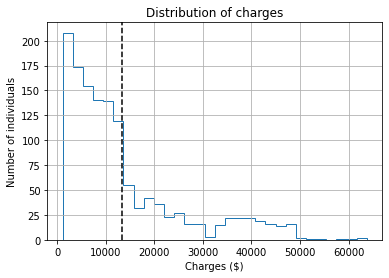

In [123]:
_ = medical.charges.hist(histtype = 'step', bins=30)
_ = plt.xlabel('Charges ($)')
_ = plt.ylabel('Number of individuals')
_ = plt.title('Distribution of charges')
_ = plt.axvline(x=np.mean(medical.charges), color='k', ls='--');

In [124]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges'])
print('mean: {}'.format(mean))
print('std: {}'.format(std))

mean: 13270.422265141257
std: 12105.484975561605


We can see that most of the data is very skewed. Thus, we may have concern about the std from the mean. Median would be more appropriate here. The median is less influenced by skewed data and outlier values. It would be a better choice in this case to determine central tendency.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We could use bootstrapping to estimate our sampling distribution. This allows us to see multiple samples from our data to draw our conclusions from. We could then have more confidence and be able to justify our answer. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
An appropriate confidence interval would be 95% given the size of our data. Since the null hypothesis is that the average charge has fallen under $12,000 (mean < 12000) we do a one sided hypothesis test.

In [125]:
n = len(medical.charges)
df = n - 1

# for 95% C.I, alpha = 0.05
# For t hypothesis test, the crit value is t.ppf(1-alpha/2, df)
alpha = 0.05

critical_value = t.ppf(1 - alpha/2,df)

In [126]:
# Now for the 95% C.I
lower = mean - (critical_value*(std/np.sqrt(n)))
upper = mean + (critical_value*(std/np.sqrt(n)))

print('95% confidence interval is: (${}, ${})'.format(round(lower),round(upper)))

95% confidence interval is: ($12621.0, $13920.0)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We seek to find if there is a difference between means, so our null hypothesis involves comparing two samples. Our null is that there is no difference, and the alternative hypothesis is that there is one. 

We also assume the variances of the samples are similar, this way we are able to do the pooled t test and combine the samples to produce a common s (sp). 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [127]:
# We start by calculating sample statistics for the insured and the uninsured

insured = medical[medical['insuranceclaim'] == 1]
uninsured = medical[medical['insuranceclaim'] == 0]

#insured
n_insured = len(insured)
mean_insured = np.mean(insured.charges)
std_insured = np.std(insured.charges)

# uninsured
n_uninsured = len(uninsured)
mean_uninsured = np.mean(uninsured.charges)
std_uninsured = np.std(uninsured.charges)

In [135]:
# Now we can manually calculate the test statistic and p-value. 

#pooled sample variance
sp =  np.sqrt((((n_insured - 1)*(std_insured**2)) + ((n_uninsured - 1)*(std_uninsured**2)))/(n_insured + n_uninsured - 2))

# pooled test statistic
test_stat = (mean_insured - mean_uninsured) / (sp *  np.sqrt((1/n_insured) + (1/n_uninsured)))

# p-value. Note: df in this case would be n1 + n2 -2
# We use stats.t.sf to find the p-value from the test statistic

df = n_insured + n_uninsured - 2
p_value = 2* t.sf(test_stat,df)


print("t-test statistic = {}".format(test_stat))
print("p_value = {}".format(p_value))

t-test statistic = 11.901306943555385
p_value = 4.090550214373795e-31


In [131]:
# We do the test using the scipy.stats function and compare results

ttest_ind_from_stats(mean1 = mean_insured, std1 = std_insured, nobs1 = n_insured,
                    mean2 = mean_uninsured, std2 = std_uninsured, nobs2 = n_uninsured)

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)

We can see that both the test statistic and the p value match. Additionally, our p_value is very small, so we can safely say that we reject the null hypothesis if we use a significance level of 0.05 or 0.01. I.E: There is a difference between the average charges of those insured vs those uninsured.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
There doesn't seem to exist a documentation for z-test in scipy.stats, however statsmodels documentation may have one. Additionally, creating the function for the z-test could be done by hand as well. The z-test assumes a large n1&n2, and thus the formula for the z-test statistic would be sightly different. Below I write a function for a z-test comparing two samples.

In [137]:
def z_test(mean1, mean2, std1, std2, n1, n2, mudiff):
    
    z_test_stat = ((mean1 - mean2) - mudiff)/ np.sqrt((std1**2)/n1 + (std2**2/n2))
    p_value = 2* (1 - norm.cdf(abs(z_test_stat)))
    
    return round(z_test_stat, 3), round(p_value,3)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test